### This file plots the processed csv files with matplotlib

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pandas as pd

## Adjust date of processed csv files

In [3]:
date = '2018-10-20_17h11'
base_path = '/Users/florianmorath/Desktop/ASL_project/scripts/1_BaselineWithoutMW/processed_data/one_server/' + date + '/'



## Throughput plot for read and write loads

In [13]:
# read data into pandas dataframe
df_w = pd.read_csv(base_path + 'one_server_mem_tp.csv')
df_w

,client,write_tp_mean,write_tp_std,read_tp_mean,read_tp_std
0,12,5374.060,232.130,3263.935,0.715
1,24,9232.825,155.765,3266.965,9.115


In [14]:
def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val)/1000000
        return str(val).rstrip('0') + ' M'
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return str(val).rstrip('0') + ' k'
    else:
        return tick_val

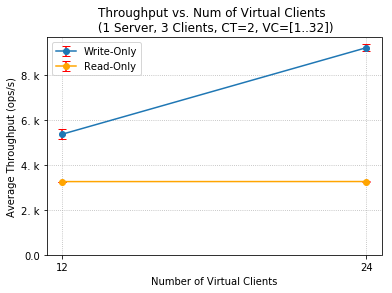

In [15]:
f = plt.figure()
plt.title("Throughput vs. Num of Virtual Clients \n (1 Server, 3 Clients, CT=2, VC=[1..32])")

vcs = df_w['client']

# write-only
tps = df_w['write_tp_mean']
std = df_w['write_tp_std']
plt.errorbar(x = vcs, y = tps, yerr = std, label = "Write-Only", capsize = 4, ecolor='r', marker='o')

# read-only
tps = df_w['read_tp_mean']
std = df_w['read_tp_std']
plt.errorbar(x = vcs, y = tps, yerr = std, label = "Read-Only", capsize = 4, ecolor='r', marker='o', color='orange')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Throughput (ops/s)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(ymin=0)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/1_BaselineWithoutMW/processed_data/one_server/2018-10-20_17h11/one_server_mem_tp.png", dpi = 150)

## Response-time plot for read and write loads

In [16]:
# read data into pandas dataframe
df_r = pd.read_csv(base_path + 'one_server_mem_rt.csv')
df_r

,client,write_rt_mean,write_rt_std,read_rt_mean,read_rt_std
0,12,1.123333,0.046667,1.840,0.003333
1,24,1.306667,0.023333,3.695,0.018333


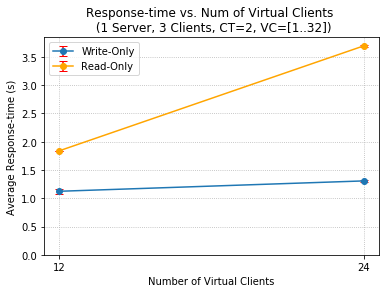

In [17]:
f = plt.figure()
plt.title("Response-time vs. Num of Virtual Clients \n (1 Server, 3 Clients, CT=2, VC=[1..32])")

vcs = df_r['client']

# write-only
tps = df_r['write_rt_mean']
std = df_r['write_rt_std']
plt.errorbar(x = vcs, y = tps, yerr = std, label = "Write-Only", capsize = 4, ecolor='r', marker='o')

# read-only
tps = df_r['read_rt_mean']
std = df_r['read_rt_std']
plt.errorbar(x = vcs, y = tps, yerr = std, label = "Read-Only", capsize = 4, ecolor='r', marker='o', color='orange')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Response-time (s)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(ymin=0)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/1_BaselineWithoutMW/processed_data/one_server/2018-10-20_17h11/one_server_mem_rt.png", dpi = 150)